In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


Load the customer_value_analysis.csv into the variable customer_df.

In [5]:
customer_df=pd.read_csv('files_for_lab/customer_value_analysis.csv')

First look at its main features (head, shape, info).

In [11]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:


display(customer_df.shape)

(9134, 24)

In [10]:

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores)

In [12]:
#create functiuon to replace spaces with _ and lowercase column names
def clean_columns(df):
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.lower()
    return df

In [13]:
customer_df=clean_columns(customer_df)

In [14]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

Change the type of effective_to_date column to DateTime format.

In [15]:

customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

check for Nan per columns

In [16]:

customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [18]:
def split_categorical_numerical(df:pd.DataFrame):
    '''
    The function takes a dataframe as input and returns two dataframes
    one with categorical variables and one with numerical variables

    '''
    categorical_df=df.select_dtypes(include='object')
    numerical_df=df.select_dtypes(include=np.number)
    return categorical_df, numerical_df

#call function
categorical_df, numerical_df=split_categorical_numerical(customer_df)

In [19]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [20]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


Drop any ID column

In [21]:
#drop customer id
categorical_df=categorical_df.drop(['customer'], axis=1)

Get the correlation matrix for the numerical variables

In [22]:
#get correlation matrix for numerical variables
corr_matrix=numerical_df.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


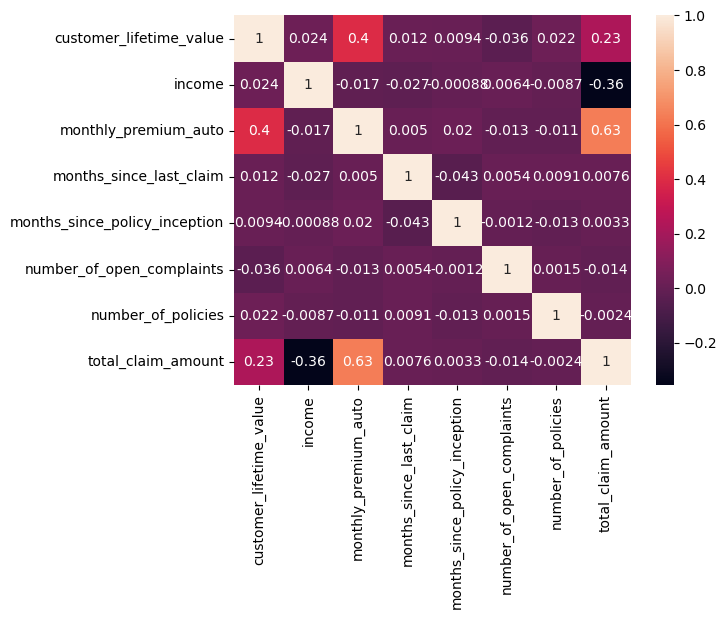

In [23]:
#show heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()


Monthly premium auto and total claim amount shows highest correlation. it makes sense because higher premium would be paid for more luxirious autos or autos with high risk factors, such as neigbourhood or usage.  and so claims coming from  those area will be considerably higher than normal

Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [25]:

def split_continuous_discrete(df:pd.DataFrame, unique_values=36):
    '''
    The function takes a dataframe as input and returns two dataframes
    one with numerical continuous variables and one with numerical discrete variables

    '''
    continuous_df=df.copy()
    discrete_df=df.copy()
    for col in df.columns:
        if len(df[col].unique()) > unique_values:
            discrete_df.drop(col, axis=1, inplace=True)
    for col in df.columns:
        if len(df[col].unique()) <= unique_values:
            continuous_df.drop(col, axis=1, inplace=True)
    return continuous_df, discrete_df

   

In [26]:
#call function
continuous_df, discrete_df=split_continuous_discrete(numerical_df)

In [27]:
#show continuous df
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [28]:
#show discrete df
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

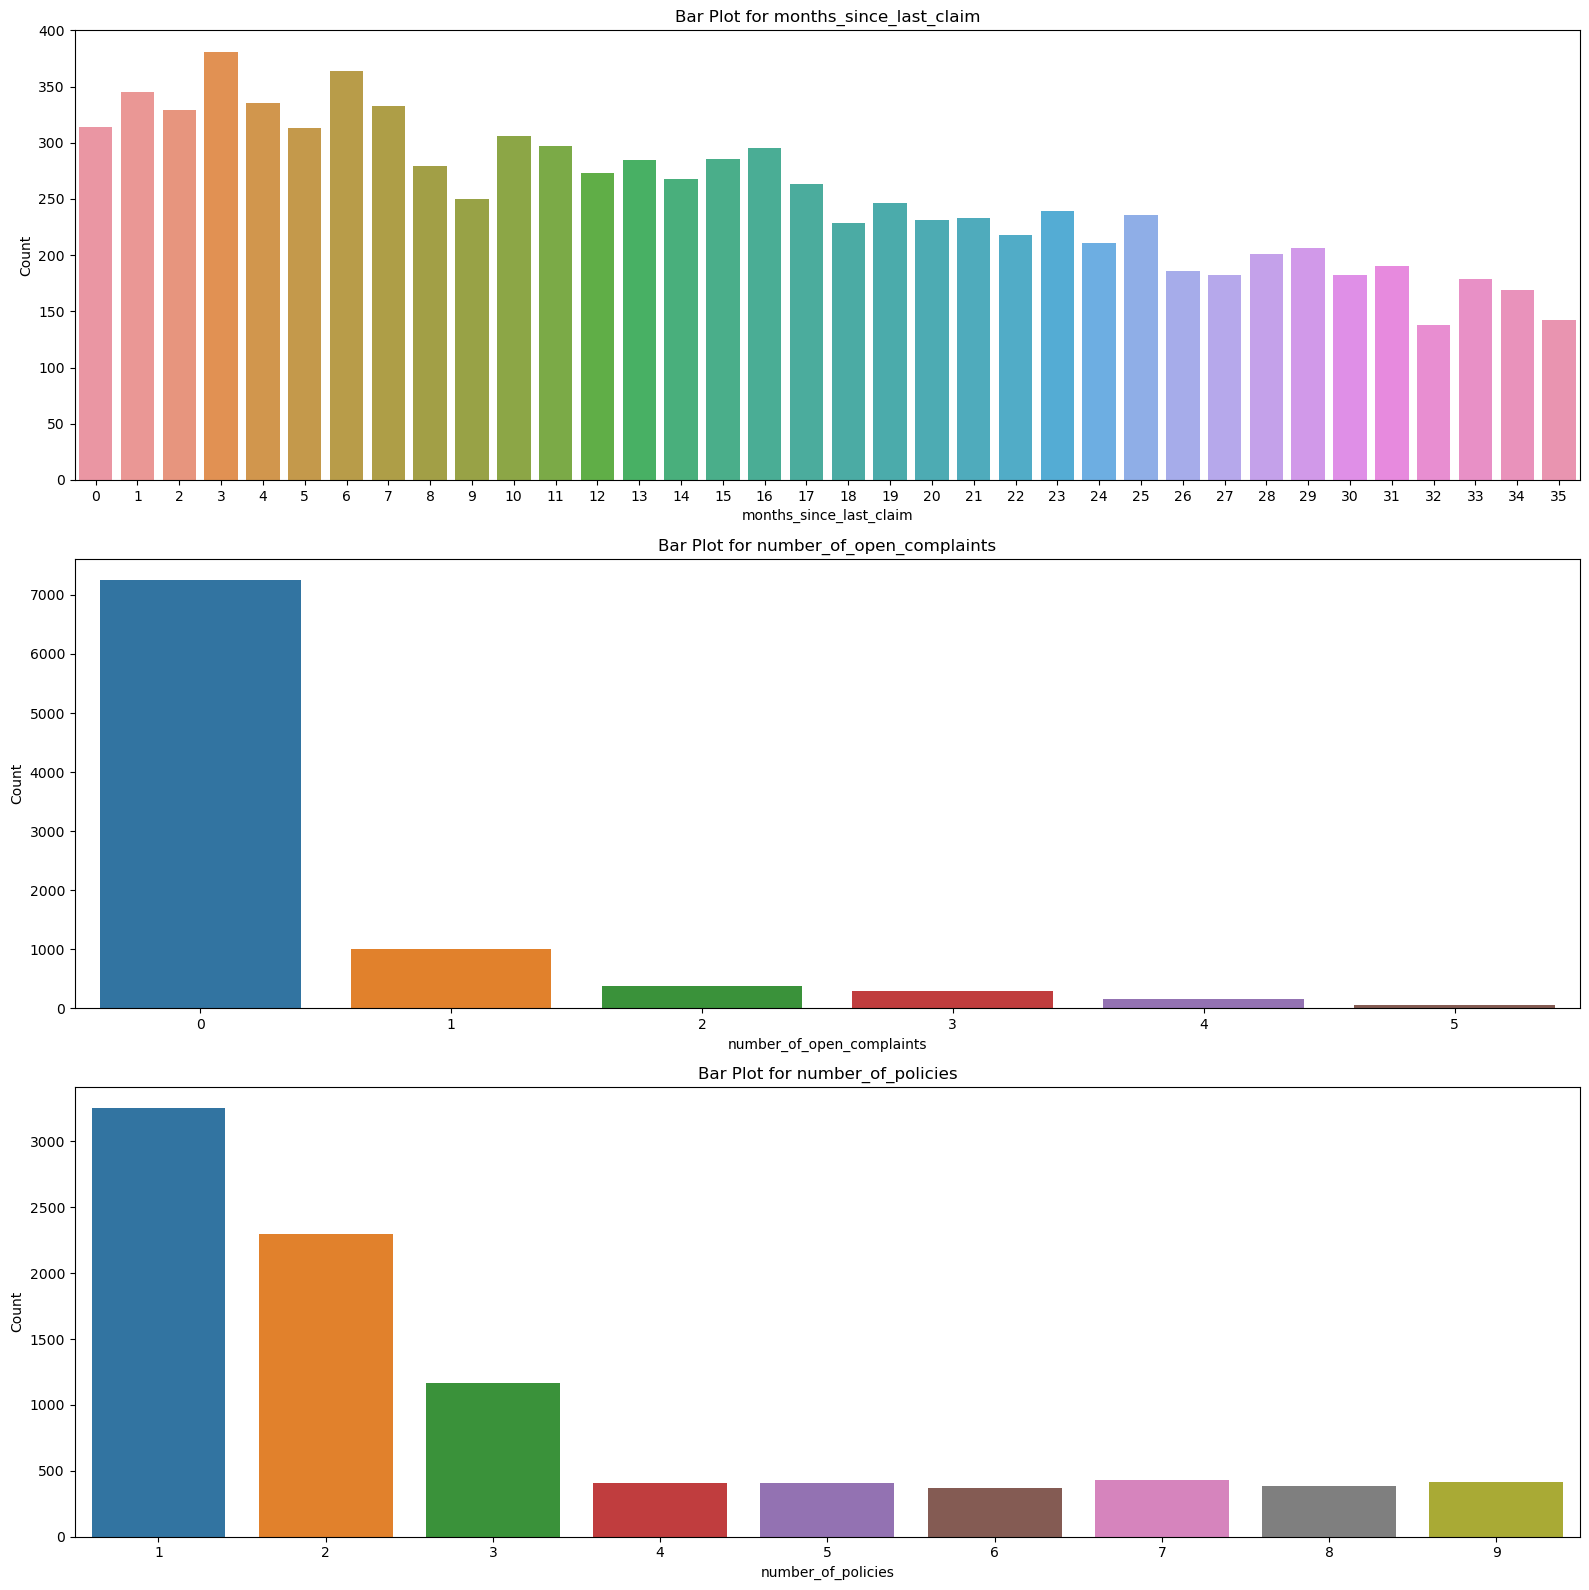

In [32]:
#Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).
def plot_discrete(df:pd.DataFrame):
    '''
    The function takes a dataframe as input and plots a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

    '''
    plt.figure(figsize=(16,16))
    columns=df.columns
    for column in columns:
        plt.subplot(len(columns), 1, columns.get_loc(column) + 1)  # Create subplots for each column
        sns.countplot(data=df, x=column)
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    
    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

#call function
plot_discrete(discrete_df)

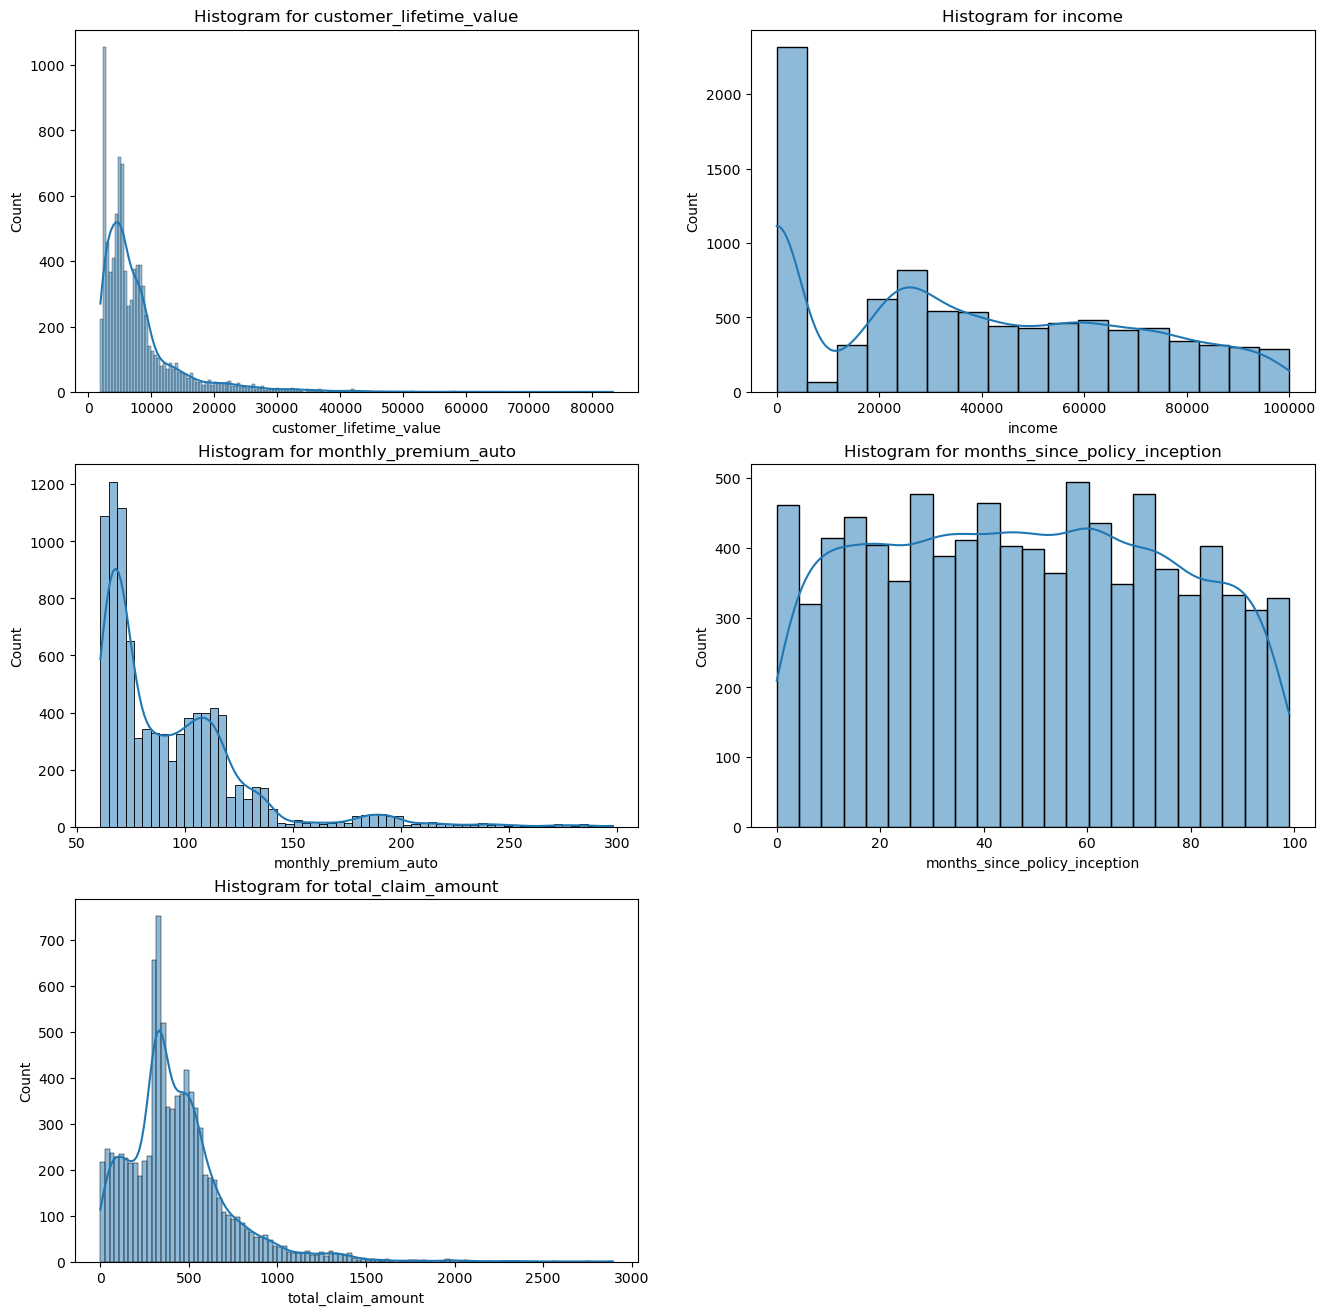

In [35]:
def continuous_histograms(df: pd.DataFrame):
    '''
    Create histograms for all the columns in the continuous_df using seaborn.
    Parameters:
     df (pd.DataFrame): The DataFrame containing continuous columns.
    
    '''

    num_cols = df.shape[1]
    num_rows = math.ceil(num_cols / 2) 

    # Create subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 16))
   
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram for {col}')
    
    # Hide any empty subplots (if num_cols is odd)
    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes[i])
    plt.show()

# Call the function to create histograms
continuous_histograms(continuous_df)








According to the previous histogram plots, do you think that you will have to apply any transformation?

We might need to do a transform to address skewness as the histogram looks heavily skewed . and make the distribution more symetrical

##Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

we will use a boxplot to spot and identify outliers

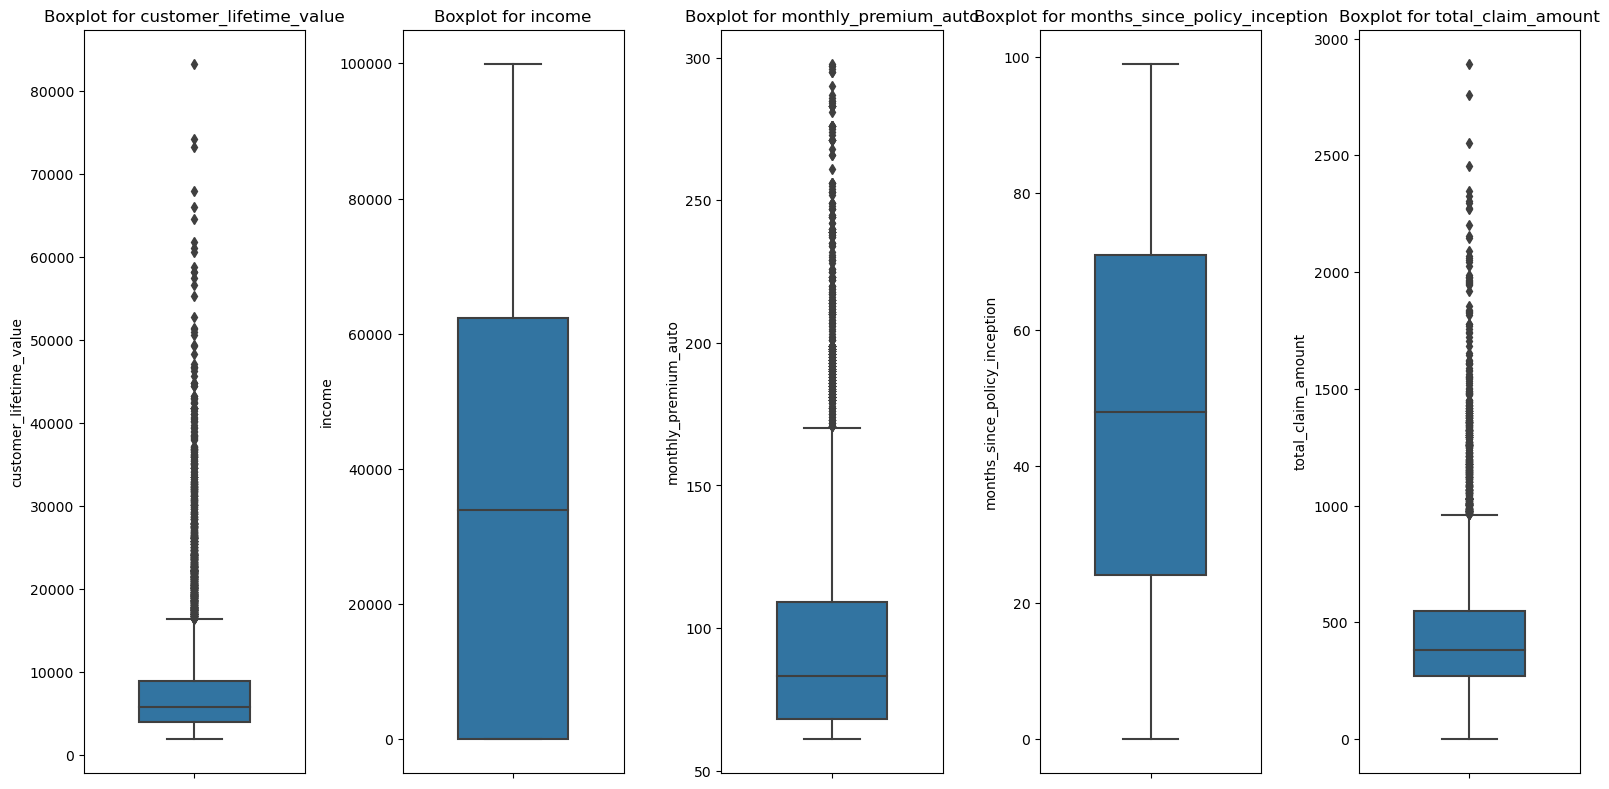

In [44]:
#define a boxplot function for continuous variables

def continuous_boxplots(df: pd.DataFrame):
    '''
    Create boxplots for all the columns in the continuous_df using seaborn.
    Parameters:
     df (pd.DataFrame): The DataFrame containing continuous columns.
    
    '''

    plt.figure(figsize=(16, 8))

    # Create boxplots for all columns in the DataFrame
    for i, column in enumerate(df.columns):
        plt.subplot(1, len(df.columns), i + 1)
        sns.boxplot(y=df[column], width=0.5)
        plt.title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()
# Call the function to create boxplots
continuous_boxplots(continuous_df)

we can see some outliers in customer_lifetime_value and total_claim_amount